# Model Based Algorithms (Monti-Carlo Tree Search):

**The Board of the game:**

In [24]:
from copy import deepcopy

class XO_Board() :

  def __init__(self,board = None):
    # define players
    self.first_player =     'x'
    self.second_player =     'o'
    self.empty_place = '-'
    self.user_input = None

    #define the board position
    self.position = {}

    # init the board
    self.init_board()

    # create a copy of previous board state 
    if board :
      self.__dict__ = deepcopy(board.__dict__)

  # initialize the board
  def init_board(self):
    # loop over board rows
    for row in range(3):
      # loop over board columns
      for col in range(3):
        # set every square to empty square
        self.position[row,col] = self.empty_place

  # implement make move
  def make_move(self,row,col):
    # create new board instance that inherits from the current state
    board = XO_Board(self)

    # make move 
    board.position[row,col] = self.first_player

    #swap players
    (board.first_player , board.second_player) = (board.second_player , board.first_player)

    # return new board state
    return board
  

  # get whether the game is draw
  def is_draw(self):
    # loop over board
    for row , col in self.position:
      # empty square is available
      if self.position[row,col] == self.empty_place:
        return False

    # by default return True
    return True

  # get whether the game is win
  def is_win(self):
    # vertical sequence detection
    # loop over board columns
    for col in range(3):
      # define the winning sequence list
      winning_sequence = []

      # loop over board rows
      for row in range(3):
        if self.position[row , col] == self.second_player:
          # update winning sequence
          winning_sequence.append((row,col)) 
        # if we have 3 elements in the row 
        if len(winning_sequence) == 3 :
          return True

    # horizontal sequence detection
    # loop over board rows
    for row in range(3):
      # define the winning sequence list
      winning_sequence = []

      # loop over board columns
      for col in range(3):
        # if found the same next element in the row
        if self.position[row , col] == self.second_player :
          # update winning sequence
          winning_sequence.append((row,col)) 
        # if we have 3 elements in the row 
        if len(winning_sequence) == 3 :
          return True

   
    # 1st diagonal sequence detection
    
    # define the winning sequence list
    winning_sequence = []
    # loop over board rows
    for row in range(3):
      # init column
      col = row
      if self.position[row , col] == self.second_player :
        # update winning sequence
        winning_sequence.append((row,col)) 
      # if we have 3 elements in the row 
      if len(winning_sequence) == 3 :
        return True

    # 2nd diagonal sequence detection  
    # define the winning sequence list
    winning_sequence = []
    # loop over board rows
    for row in range(3):
      # init column
      col = 3-row-1
      if self.position[row , col] == self.second_player :
        # update winning sequence
        winning_sequence.append((row,col)) 
      # if we have 3 elements in the row 
      if len(winning_sequence) == 3 :
        return True


    return False

  # generate legal moves
  def generate_moves(self):
    actions = []
    # loop over board rows
    for row in range(3):
      # loop over board columns
      for col in range(3):
        # make sure the current position is empty
        if self.position[row,col] == self.empty_place :
          # append available actions/board state to action list
          actions.append(self.make_move(row,col))

    # return the list of available actions (board class instances)
    return actions

  # main game loop 
  def game(self,num_iter):
    print('   \nWelcome to X O Game:')
    print('===================================')
    user_input_1 = ''
    while True:
        print(' \nPlease Choose if you want to play with x or o  ? \n')
        user_input_1 = input()
        if user_input_1 == 'x':
          self.first_player = 'x'
          self.second_player = 'o'
          break
        elif user_input_1 == 'o':
          self.first_player = 'o'
          self.second_player = 'x' 
          break
        elif user_input_1 == 'exit':
          return
        else:
            continue
    if  user_input_1 == 'x' :       
         print('\nYou will play with x , and the Agent will play with o\n')
    else:
         print('\nYou will play with o , and the Agent will play with x\n')   

    print('enter your move for example : [x,y] = 1,2 where 1 is row and 2 is col,  or type "exit" to quit the game')

    self.user_input = user_input_1
    print(self)

    # create monti carlo tree search instance
    mcts = MCTS()

    # game loop
    while True :
      # user input
      user_input = input('> ')

      if user_input == 'exit':
        break

      # skipp empty input
      if user_input == '':
        continue
      try:
        # parse user input ===> ex : format for move [col,row] = (1,3)
        row = int(user_input.split(',')[0]) - 1
        col = int(user_input.split(',')[1]) - 1

        # check if the move is legal or not
        if self.position[row,col] != self.empty_place:
          print('Illegal move !!!')
          continue

        # make move on board
        self = self.make_move(row,col)
        # print board
        print('-------------------------You Played------------------------ :)\n')
        print(self) 


        # search for the best move
        best_move = mcts.search(self,num_iter)


        # make AI Agent move ....
        # legal moves available
        try:
           self = best_move.board
        except:
           pass   


        # print board
        print('------------------------Agent Played----------------------- :)\n')
        print(self) 

        # check the game state
        if self.is_win():
          print(' Player "%s" has won the game \n' % self.second_player )
          break

        elif self.is_draw():
          print('Oooh We have a draw \n')
          break   


      except Exception as e:
        print('Error: ' , e)
        print('Illegal command !!!')
        print('enter your move for example : [x,y] = 1,2 where 1 is row and 2 is column,  or type "exit" to quit the game')


  # print the board state
  def __str__(self):
    # define board string representation
    board_str = ''
    # loop over board rows
    for row in range(3):
      # loop over board columns
      for col in range(3):
        board_str += ' %s' % self.position[row,col]

      # print new line 
      board_str += '\n'

    # side to move 
    if self.first_player == self.user_input:
      board_str = '\n---------------------------\n "Your Turn ==>  "%s" to go"   \n---------------------------\n\n' %self.user_input + board_str
    
    else:
      board_str = '\n---------------------------\n "Agent Turn"    \n---------------------------\n\n' + board_str

    return board_str
   


**Tree Node Class:**

In [25]:
import math
import random
# Tree node class 
class TreeNode():
  def __init__(self,board,parent):
    self.board = board

    # check if the node is terminal
    if self.board.is_win() or self.board.is_draw():
      # that means the game is over
      self.is_terminal = True 
    else :
      # we have a non terminal node
      self.is_terminal = False  

    # initialise is fully expanded flag
    self.is_fully_expanded = self.is_terminal
    # initialise parent node if available 
    self.parent = parent  
    # initialize the number of node visits
    self.visits = 0

    # initialize the total score of the node
    self.score =  0

    # initialize the current node children
    self.children = {}  


**MCTS class:**

In [26]:
class MCTS():
  # search for the best move in the current position
  def search(self,initial_state,num_iter):
    # create root node
    self.root = TreeNode(initial_state,None)

    # Do iterations
    for iteration in range(num_iter):
      # select a node (selection phase)
      node = self.select(self.root)

      # score current node (simulation phase)
      score = self.simulate_game(node.board)
      # backpropagate the number of visits and the score
      self.backpropagate(node,score)

    # pick up the best move in the current position
    try:
      return self.get_best_move(self.root,0)
    except:
      pass  

  # select most promising node
  def select(self,node):
    # make sure that it is not a terminal node
    while not node.is_terminal:
      # case where the node is fully expanded
      if node.is_fully_expanded:
        node = self.get_best_move(node,2)
      # case where the node is not fully expanded
      else:
        # expand the nodes
        return self.expand(node)
    return node


  # expand node
  def expand(self,node):
    # generate legal moves for the given node
    states = node.board.generate_moves()
    # loop over generated 
    for state in states:
      # make sure that the current node is not present in child nodes 
      if str(state.position) not in node.children:
        # create new node
        new_node = TreeNode(state,node)
        # add child node to parent's node children
        node.children[str(state.position)] = new_node

        # check if node is fully expanded
        if len(states) == len(node.children):
          node.is_fully_expanded = True
        # return newly created node
        return new_node  


  # simulate the game by making random moves until reach the end of the game
  def simulate_game(self,board):
    # make random moves for both sides until terminal state is reached
    while not board.is_win():
      # try to make a move
      try:
        # make the move on board
        board = random.choice(board.generate_moves())
        
      except:
        # return a draw score    
        return 0
        
    # return the score from player x perspective
    if board.second_player == board.user_input:
      return 1
    else:
      return -1    


  #  backpropagate   
  def backpropagate(self,node,score):
    # update node visit count and score up to root node
    while node is not None:
      # update node's visits
      node.visits += 1
      # update node's score
      node.score += score
      # set node to parent
      node = node.parent

  # select the best node based on UCB1 formula
  def get_best_move(self,node,exploration_factor):
    # define best score and best moves
    best_score = float('-inf')
    best_moves = []
    # loop over node's children
    for child in node.children.values():
      # define current player
      if child.board.second_player == child.board.user_input: 
        current_player = 1
      else:   
        current_player = -1

      # use UCB1 formula to get the move score
      move_score = current_player * child.score / child.visits + exploration_factor * math.sqrt(math.log(node.visits/child.visits))

      #better move has been found 
      if move_score > best_score:
        best_score = move_score
        best_moves = [child]

      # move score is equal to the best score  
      elif move_score == best_score :
        best_moves.append(child)

    # return one of the best moves randomly
    return random.choice(best_moves)

# Now Try to play the game (Human vs Agent) =========> :) :

In [ ]:
if __name__ == '__main__':
  # create board instance 
  board = XO_Board()
  # create mcts
  mcts = MCTS()
  # start game loop 
  board.game(2000)

# Model Free Algorithm (DQN) :

# ENV

In [35]:
from copy import deepcopy

class XO_Board() :

  def __init__(self,board = None):
    self.first_player = 'x'
    self.second_player = 'o'
    self.empty_place = '-'
    self.user_input = None
    self.WIN_REWARD = 1
    self.DRAW_REWARD = 0
    self.LOSS_REWARD = -1
    self.STUPID_ACTION_REWARD = -0.5
    self.SMART_ACTION_REWARD = 0
    self.EPS_START = 1.0
    self.eps_threshold=2
    self.EPS_END = 0.01
    self.EPS_DECAY = 800000
    self.agent_winner=0
    self.mcts_winner=0
    self.draw=0
    # self.agent_player = 'x'
    # self.mcts_player = 'o'
    self.position = {}
    mcts = MCTS()


    # init the board
    self.init_board()

    # create a copy of previous board state 
    if board:
      self.__dict__ = deepcopy(board.__dict__)
    else:
      self.init_board()

  # initialize the board
  def init_board(self, empty=True):
    for row in range(3):
      for col in range(3):
        # set every square to empty square
        self.position[row,col] = self.empty_place  
    if not empty and  random.random()>0.5:
      r_action = random.randrange(9)
      row, col = self.action_to_ids(r_action+1)
      self.position[row,col] = 'o'



  # get whether the game is draw
  def is_draw(self):
    for row , col in self.position:
      # empty square is available
      if self.position[row,col] == self.empty_place:
        return False
    return True

  # get whether the game is win
  def is_win(self):
    # vertical sequence detection
    for col in range(3):
      # define the winning sequence list
      winning_sequence = []
      for row in range(3):
        if self.position[row , col] == self.second_player:
          # update winning sequence
          winning_sequence.append((row,col)) 
        # if we have 3 elements in the row 
        if len(winning_sequence) == 3 :
          return True

    # horizontal sequence detection
    for row in range(3):
      # define the winning sequence list
      winning_sequence = []
      for col in range(3):
        # if found the same next element in the row
        if self.position[row , col] == self.second_player :
          # update winning sequence
          winning_sequence.append((row,col)) 
        # if we have 3 elements in the row 
        if len(winning_sequence) == 3 :
          return True

    # 1st diagonal sequence detection
    # define the winning sequence list
    winning_sequence = []
    for row in range(3):
      # init column
      col = row
      if self.position[row , col] == self.second_player :
        # update winning sequence
        winning_sequence.append((row,col)) 
      # if we have 3 elements in the row 
      if len(winning_sequence) == 3 :
        return True

    # 2nd diagonal sequence detection  
    # define the winning sequence list
    winning_sequence = []
    # loop over board rows
    for row in range(3):
      # init column
      col = 3-row-1
      if self.position[row , col] == self.second_player :
        # update winning sequence
        winning_sequence.append((row,col)) 
      # if we have 3 elements in the row 
      if len(winning_sequence) == 3 :
        return True
    return False


  # generate legal moves
  def generate_moves(self):
    boards = [] #list of objects
    for row in range(3):
      for col in range(3):
        # make sure the current position is empty
        if self.position[row,col] == self.empty_place :
          # append available actions/board state to action list
          boards.append(self.make_move(row,col))
    # return the list of available actions (board class instances)
    return boards

  # implement make move
  def make_move(self,row,col):
    #create new board instance that inherits from the current state
    board = XO_Board(self)
    #make move 
    board.position[row,col] = self.first_player
    #swap players
    (board.first_player , board.second_player) = (board.second_player , board.first_player)
    return board

  # print the board state
  def __str__(self):
    # define board string representation
    board_str = ''
    for row in range(3):
      for col in range(3):
        board_str += ' %s' % self.position[row,col]
      # print new line 
      board_str += '\n'

    # side to move 
    if self.first_player == self.user_input:
      board_str = '\n---------------------------\n "Your Turn ==>  "%s" to go"   \n---------------------------\n\n' %self.user_input + board_str
    else:
      board_str = '\n---------------------------\n "Agent Turn"    \n---------------------------\n\n' + board_str
    return board_str

  def get_state(self):
    board_str = ''
    for row in range(3):
      for col in range(3):
        board_str += ' %s' % self.position[row,col]
      board_str += '\n'
      
    print(board_str)

  # implement make move
  # def make_agent_move(self,row,col):
  #   self.position[row,col] = self.agent_player
  #   (board.mcts_player , board.agent_player) = (board.agent_player , board.mcts_player)
    
  def step(self, action, mask): #action 1-9
    '''
    action : 1->9
    '''
    reward = 0
    if (is_smart_action(self.position_list(), action-1)):
      reward+= self.SMART_ACTION_REWARD

    state = self.position_list()
    if state[action-1]==1 or state[action-1]==-1: #action is not available
      print(f'action not avaliable action<0,8> {action-1} , satae {state}, mask {mask}')###
      # env.get_state()###
      return state, self.STUPID_ACTION_REWARD, False, state

    ######### agent  #########
    ######### agent  #########

    row, col = self.action_to_ids(action)
    # print('before agent',self.first_player)
    self.__dict__ = deepcopy(self.make_move(row, col).__dict__)

    agent_win = self.is_win()
    if agent_win:
      self.agent_winner+=1
      print('agent won ',self.agent_winner, ' eps ',self. eps_threshold)###
      # self.get_state()###
      reward+=self.WIN_REWARD
      return state, reward, True, None 
    elif self.is_draw():
      self.draw+=1
      print('draw ', self.draw, ' eps ',self. eps_threshold)###
      # self.get_state()###
      reward+=self.DRAW_REWARD
      return state, reward, True, None 
    # print('agent [x]')###
    # self.get_state()###

    ######### mcts  #########
    ######### mcts  #########
    #self.EPS_START = 1.0 self.EPS_END = 0.9
    # self.eps_threshold = self.EPS_END + (self.EPS_START - self.EPS_END) * \
    #     math.exp(-1. * steps_done / self.EPS_DECAY)

    self.eps_threshold = 0.9     # the oponnent will play 90% of the time random and 10% MCTS 
    sample = random.random()
    if sample >self.eps_threshold: #use mcts 1.0->0.9
      best_mcts_move = mcts.search(self,800)
      # make AI Agent move ....
      try:
          self.__dict__ = deepcopy(best_mcts_move.board.__dict__)
          
      except:
          raise Exception 

    else:  #choose random action
        mask[action-1] = False #action played by the agent
        while True:
          r_action=random.randrange(n_actions)
          if mask[r_action]: #available action
            row, col = self.action_to_ids(r_action+1)
            # print('random')
            self.__dict__ = deepcopy(self.make_move(row, col).__dict__)
            break

    mcts_win = self.is_win()
    if mcts_win:
      self.mcts_winner+=1
      print('mcts won ',self.mcts_winner,' eps ',self. eps_threshold)###
      # self.get_state()###
      reward+=self.LOSS_REWARD
      return state, reward, True, None 
    elif self.is_draw():
      self.draw+=1
      print('draw ',self.draw, ' eps ', self. eps_threshold)
      # self.get_state()###
      reward+=self.DRAW_REWARD
      return state, reward, True, None 
    # print('mcts [o]')###
    # self.get_state()###
    

    return state, reward, False, self.position_list()   #s, reward, done, new_s


  def action_to_ids(self, action):
    if action==1:
      row=0;col=0
    elif action==2:
      row=0;col=1
    elif action==3:
      row=0;col=2
    elif action==4:
      row=1;col=0
    elif action==5:
      row=1;col=1  
    elif action==6:
      row=1;col=2    
    elif action==7:
      row=2;col=0
    elif action==8:
      row=2;col=1
    elif action==9:
      row=2;col=2
    else:
      raise Exception()
    
    
    return row, col
  

  def action_sapce(self):
    return [1,2,3,4,5,6,7,8,9]

  def position_list(self):
    state = []
    for i in list(self.position.values()):
      if i=='-':
        state.append(0)
      elif i=='x':
        state.append(1)
      elif i=='o':
        state.append(-1)

    return state

**Try to initialize the board using the environment:**

In [28]:
env = XO_Board()
mcts = MCTS()
env.init_board()
env.get_state()

 - - -
 - - -
 - - -



**check if the action is smart action (in order to give the agent a reward):**

In [29]:
def is_smart_action(position_list, a): #<0,8>
  o=2
  if a<3: #0,1,2
    if position_list[:3].count(o)==2:
      return True
  if a>=3 and a<6: #3,4,5
    if position_list[3:6].count(o)==2:
      return True
  if position_list[6:].count(o)==2:
    return True

  if position_list[4]==o:#center
    if a==0 and position_list[8]==o:
      return True
    elif a==2 and position_list[6]==o:
      return True
    elif a==6 and position_list[2]==o:
      return True
    elif a==8 and position_list[2]==o:
      return True
  if a==0 or a==3 or a==6:
    if [position_list[0], position_list[3], position_list[6]].count(o)==2:
      return True
  if a==1 or a==4 or a==7:
    if [position_list[1], position_list[4], position_list[7]].count(o)==2:
      return True
  if a==2 or a==5 or a==8:
    if [position_list[2], position_list[5], position_list[8]].count(o)==2:
      return True
  if a==4:
    if position_list[0]==o and position_list[8]==o:
      return True
    elif position_list[2]==o and position_list[6]==o:
      return True

  return False

#DQN:

**Setting up the training environment :**

**Fix the Seed**

In [30]:
import random
import torch
import numpy as np
seed= 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [31]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


# env = gym.make('CartPole-v0').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%matplotlib inline

In [32]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size): #sample random batch
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [33]:
class DQN(nn.Module):

    def __init__(self, outputs=9, num_embeddings=3, embedding_dim=1):
        super(DQN, self).__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.outputs = outputs
        # self.emb = nn.Embedding(num_embeddings=self.num_embeddings, embedding_dim=self.embedding_dim)
        #[0, 2, 0, 1, 0, 0, 0, 0, 0] ==> 9x16
        
        self.linear1 = nn.Linear( 9,  64) #16*9 x 16*9
        # self.linear2 = nn.Linear( 64, 128)
        self.linear2 = nn.Linear( 64, 64)
        self.output = nn.Linear(64, self.outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        # print(x.shape,x)
        # x = self.emb(x)
        # print('shape ',x.shape)
        # x = x.view(-1,9*self.embedding_dim)
        # print('f shape ',x.shape)
        x=x.float()
        # print('xxxxx ',x)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        # x = F.relu(self.linear3(x))
        return self.output(x)

#Training

# Training parameters:

In [34]:
BATCH_SIZE = 256
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 5000000
TARGET_UPDATE = 250
MEMORY_SIZE = 800000
steps_done = 0
n_actions = 9

In [11]:
policy_net = DQN(outputs=n_actions, num_embeddings=3, embedding_dim=16).to(device)
target_net = DQN(outputs=n_actions, num_embeddings=3, embedding_dim=16).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(),lr=0.0001)
                       

def select_action(state, policy_net,mask=None):  
      global steps_done
      global eps_threshold
      sample = random.random()
      eps_threshold = EPS_END + (EPS_START - EPS_END) * \
          math.exp(-1. * steps_done / EPS_DECAY)
      steps_done += 1
      if sample > eps_threshold:
          # print('select action, agent',eps_threshold)
          with torch.no_grad():
              # t.max(1) will return largest column value of each row.
              # second column on max result is index of where max element was
              # found, so we pick action with the larger expected reward.
              if mask is not None:
                # mask = np.array([1,1,1,0,0,0,1,1,1]) #mask =1 where empty
                ids = torch.tensor(np.where(mask)).squeeze()
                p = policy_net(state).squeeze().cpu()
                max_value = p[ids].max(0)[0].view(1)
                # print(f'select action agent ids: {ids} p[ids].max(0)[1] {p[ids].max(0)[1]}')
                # return p[ids].max(0)[1].view(1)
                max_index = (p == max_value).nonzero(as_tuple=True)[0][0].view(1)
                # print('action =  ' , max_index)
                return max_index
              else:
                return policy_net(state).max(1)[1].view(1)

      else:
          # print('select action, random',eps_threshold)
          while True:
            action=random.randrange(n_actions)
            if mask[action]:
              break
          return torch.tensor([action], device=device, dtype=torch.long)


episode_durations = []

def plot_durations(episode_durations):
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())


    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [12]:
criterion = nn.SmoothL1Loss() #nn.MSELoss() 

def optimize_model(criterion=criterion):

    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions to Transition of batch-arrays.
    batch = Transition(*zip(*transitions)) #[(state, action, next_state, reward)]


    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool) # s=[2,3,None,4] ==> tensor([ True,  True, False,  True])
    non_final_next_states = torch.stack([s for s in batch.next_state
                                                if s is not None]).to(device)

    state_batch = torch.stack(batch.state)
    # state_batch = [[0,2,1,1,0,2,1,2,1],
    #                [0,1,2,0,0,0,0,1,0]]
    
    action_batch = torch.stack(batch.action)
    # action_batch = [1,3]
    reward_batch = torch.stack(batch.reward)
    #reward_batch = [-1,0]
    # print('batch non_final_next_states',non_final_next_states))###
    # print('batch state_batch',state_batch))###
    # print('batch action_batch',action_batch))###
    # print('batch reward_batch',reward_batch))###

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch.to(device)).gather(1, action_batch.to(device))  #Qo(s,a) == state_action_values = [22,14] for action_batch= [1,3]

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    #next_state_values[final_state]=0 (the next value for the final state is 0)
    next_state_values[non_final_mask] = target_net(non_final_next_states.to(device)).max(1)[0].detach() #max[Qt(s,a)] 
    # Compute the expected Q values
    expected_state_action_values = reward_batch + (GAMMA * next_state_values.view(256,1))

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    # print('state_action_values, expected_state_action_values.unsqueeze(1)'))###
    # print(state_action_values, expected_state_action_values.unsqueeze(1)))###
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
    # print('shape ',state_action_values.shape, expected_state_action_values.shape)
    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # for param in policy_net.parameters():
    #     param.grad.data.clamp_(-1, 1)
    optimizer.step()

    return loss.item(), state_action_values.mean().item()


**Training Loop :**

# Trainig without Mask (No Negative reward for non-available action):

game #num:  1
action not avaliable action<0,8> 4 , satae [0, 0, 0, -1, -1, 1, -1, 0, 1], mask [True, True, True, False, False, False, False, True, False]
mcts won  1  eps  0.9
################################################################################################
episode_reward :  [0, 0, 0, -1]
################################################################################################
game loss:  nan q value nan  reward : -1
game #num:  2
action not avaliable action<0,8> 5 , satae [0, -1, 0, 0, 0, 1, 0, 0, 0], mask [True, False, True, True, True, False, True, True, True]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: inval

action not avaliable action<0,8> 0 , satae [-1, -1, 0, 1, 0, 1, 0, 0, 0], mask [False, False, True, False, True, False, True, True, True]
action not avaliable action<0,8> 2 , satae [-1, -1, 1, 1, 0, 1, 0, -1, 0], mask [False, False, False, False, True, False, True, False, True]
action not avaliable action<0,8> 0 , satae [-1, -1, 1, 1, 0, 1, 0, -1, 0], mask [False, False, False, False, True, False, True, False, True]
action not avaliable action<0,8> 0 , satae [-1, -1, 1, 1, 0, 1, 0, -1, 0], mask [False, False, False, False, True, False, True, False, True]
action not avaliable action<0,8> 0 , satae [-1, -1, 1, 1, 0, 1, 0, -1, 0], mask [False, False, False, False, True, False, True, False, True]
action not avaliable action<0,8> 1 , satae [-1, -1, 1, 1, 0, 1, 0, -1, 0], mask [False, False, False, False, True, False, True, False, True]
action not avaliable action<0,8> 5 , satae [-1, -1, 1, 1, 0, 1, 1, -1, -1], mask [False, False, False, False, True, False, False, False, False]
action not av

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:921: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Streaming output truncated to the last 5000 lines.
################################################################################################
episode_reward :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
################################################################################################
game loss:  0.1153393414887515 q value 0.32308229262178595  reward : 1
game #num:  14552
action not avaliable action<0,8> 6 , satae [0, 0, 0, 0, 0, -1, -1, 1, 1], mask [True, True, True, True, True, False, False, False, False]
mcts won  5201  eps  0.9
################################################################################################
episode_reward :  [0, 0, 0, 0, -1]
################################################################################################
game loss:  0.1121131032705307 q value 0.3247246265411377  reward : -1
game #num:  14553
mcts won  5202  eps  0.9
################################################################################################
episode_rew

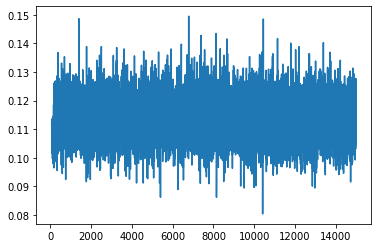

In [13]:
#env.step(action) -> s, reward, done, s'
#optimize_model
env = XO_Board()
mcts = MCTS()
env.init_board()
memory = ReplayMemory(MEMORY_SIZE)

losses_list = []
num_episodes = 15000
reward_list=[]
q_list=[]
tr_eps=[]
for i_episode in range(num_episodes):
    episode_loss=[]
    episode_q = []
    episode_reward=[]
    print('game #num: ',i_episode+1)
    # Initialize the environment and state
    env.init_board(empty=False)
    # last_screen = get_screen()
    # current_screen = get_screen()
    state = env.position_list()#current_screen - last_screen
    for t in count():
        # Select and perform an action
        mask=[]
        for i in env.position_list():
          mask.append(not (i==-1 or i==1))
        action = select_action(torch.tensor(state).to(device), policy_net, mask=np.array([1,1,1,1,1,1,1,1,1])) #0->8np.array(mask)
        action = action.cpu()
        _, reward, done, new_s = env.step(action.item()+1,mask) #<1,9>
        # print('new s', new_s)
        episode_reward.append(reward)
        
        reward = torch.tensor([reward], device=device)
        # Observe new state
        # last_screen = current_screen
        # current_screen = get_screen()
        # if not done:
        #     next_state = new_s #current_screen - last_screen
        # else:
        #     next_state = None

        # Store the transition in memory
        # print('push')###
        if new_s:
          new_s = torch.tensor(new_s)
          # print(torch.tensor(state), action, reward, new_s))###
        # else: ###
          # print('new state is None')###
          # print(torch.tensor(state), action, reward)###
        
        if not np.all(np.array(torch.tensor(state))== np.array(new_s)):
          memory.push(torch.tensor(state), action, new_s, reward)
        # else:
        #   print('eorrrrrrrrrr in adding the data sample')

        # Move to the next state
        state = new_s

        # Perform one step of the optimization (on the policy network)
        # print('memoooory ',len(memory))
        if len(memory) > BATCH_SIZE:
          loss, q = optimize_model() #BSGD
          episode_q.append(q)
          episode_loss.append(loss)
          
          # print('lossssssss ',loss)

        if done:
            episode_durations.append(t + 1)
            # episode_reward = reward
            break

        tr_eps.append(eps_threshold)
    print('################################################################################################')
    print('episode_reward : ' , episode_reward)
    print('################################################################################################')
          

    reward_list.append(np.sum(episode_reward))
    q_list.append(np.mean(episode_q))
    losses_list.append(np.mean(episode_loss))
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())
    print('game loss: ',np.mean(episode_loss), 'q value',np.mean(episode_q), ' reward :',np.sum(episode_reward))

print('Complete')
# env.render()
# env.close()
plt.ioff()
plt.plot(losses_list)
plt.show()
# plot_durations(episode_durations)

# Training without Mask (Negative Reward for non-available action):

In [ ]:
#env.step(action) -> s, reward, done, s'
#optimize_model
env = XO_Board()
mcts = MCTS()
env.init_board()
memory = ReplayMemory(MEMORY_SIZE)

losses_list = []
num_episodes = 6000
reward_list=[]
q_list=[]

for i_episode in range(num_episodes):
    episode_loss=[]
    episode_q = []
    episode_reward=[]
    print('game #num: ',i_episode+1)
    # Initialize the environment and state
    env.init_board(empty=False)
    # last_screen = get_screen()
    # current_screen = get_screen()
    state = env.position_list()#current_screen - last_screen
    for t in count():
        # Select and perform an action
        mask=[]
        for i in env.position_list():
          mask.append(not (i==-1 or i==1))
        action = select_action(torch.tensor(state).to(device), policy_net, mask=np.array([1,1,1,1,1,1,1,1,1])) #0->8np.array(mask)
        action = action.cpu()
        _, reward, done, new_s = env.step(action.item()+1,mask) #<1,9>
        # print('new s', new_s)
        episode_reward.append(reward)
        
        reward = torch.tensor([reward], device=device)
        # Observe new state
        # last_screen = current_screen
        # current_screen = get_screen()
        # if not done:
        #     next_state = new_s #current_screen - last_screen
        # else:
        #     next_state = None

        # Store the transition in memory
        # print('push')###
        if new_s:
          new_s = torch.tensor(new_s)
          # print(torch.tensor(state), action, reward, new_s))###
        # else: ###
          # print('new state is None')###
          # print(torch.tensor(state), action, reward)###
        
        # if not np.all(np.array(torch.tensor(state))== np.array(new_s)):
        memory.push(torch.tensor(state), action, new_s, reward)
        # else:
        #   print('eorrrrrrrrrr in adding the data sample')

        # Move to the next state
        state = new_s

        # Perform one step of the optimization (on the policy network)
        # print('memoooory ',len(memory))
        if len(memory) > BATCH_SIZE:
          loss, q = optimize_model() #BSGD
          episode_q.append(q)
          episode_loss.append(loss)
          
          # print('lossssssss ',loss)

        if done:
            episode_durations.append(t + 1)
            # episode_reward = reward
            break

        tr_eps.append(eps_threshold)
    print('################################################################################################')
    print('episode_reward : ' , episode_reward)
    print('################################################################################################')
          

    reward_list.append(np.sum(episode_reward))
    q_list(np.mean(episode_q))
    losses_list.append(np.mean(episode_loss))
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())
    print('game loss: ',np.mean(episode_loss), 'q value',np.mean(episode_q), ' reward :',np.sum(episode_reward)))



print('Complete')
# env.render()
# env.close()
plt.ioff()
plt.plot(losses_list)
plt.show()
# plot_durations(episode_durations)

# Plot :

In [14]:
import numpy as np
import torch

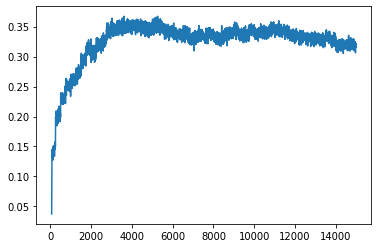

In [15]:
plt.plot(q_list)
plt.show()

**Loss:**

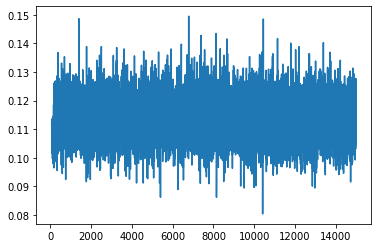

In [16]:
plt.plot(losses_list)
plt.show()

**Reward:**

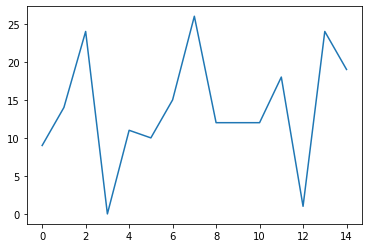

In [17]:
import matplotlib.pyplot as plt
reward_sum=[]
for i in range(0,len(reward_list),1000):
  if i+100 < len(reward_list):
    reward_sum.append(np.sum(reward_list[i:i+100]))
  else:
    reward_sum.append(np.sum(reward_list[i:]))


plt.plot(reward_sum)
plt.show()

# Save the model:

In [26]:
torch.save(policy_net.state_dict(),'ploicy_net.ckpt')

# Try to play against agent (Human Vs Agent):

In [18]:
# main game loop 

def game_select_action(state, policy_net,mask=None): #eps-greedy 
    '''
    0-greddy
    return action <0,8>
    '''
    global steps_done
    sample = random.random()
    eps_threshold = 0.9# EPS_END + (EPS_START - EPS_END) * \
    #     math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample < eps_threshold:
        with torch.no_grad():
            if mask is not None:
              ids = torch.tensor(np.where(mask)).squeeze()
              p = policy_net(state).squeeze().cpu()
              max_value = p[ids].max(0)[0].view(1)
              max_index = (p == max_value).nonzero(as_tuple=True)[0]
              print('action =  ' , max_index)
              return max_index
            else:
              return policy_net(state).max(1)[1].view(1)
    else:
        print('select action, random',eps_threshold)
        while True:
          action=random.randrange(n_actions)
          if mask[action]:
            break
        return torch.tensor([action], device=device, dtype=torch.long)

def game():
  print('   \nWelcome to X-O Game:')
  print('===================================')
  print('enter your move for example : [x,y] = 1,2 where 1 is row and 2 is col,  or type "exit" to quit the game')

  env.init_board() 
  # game loop
  while True :


      # make AI Agent move ....
      while True:
        #mask to select only the available actions
        mask=[]
        for i in env.position_list():
          mask.append(not (i==-1 or i==1))
        mask = np.array(mask)
        action = game_select_action(torch.tensor(env.position_list()).cuda(), policy_net, mask) #0->8
        row, col = env.action_to_ids(action+1)
        if env.position[row,col] == env.empty_place:
          env.position[(row,col)] = 'x'
          break

      print('------------------------Agent Turn----------------------- :)\n')
      env.get_state()

      # user input
      user_input = input('> ')

      if user_input == 'exit':
        break

      # skipp empty input
      if user_input == '':
        continue
      try:
        # parse user input ===> ex : format for move [col,row] = (1,3)
        row = int(user_input.split(',')[0]) - 1
        col = int(user_input.split(',')[1]) - 1

        # check if the move is legal or not
        if env.position[row,col] != env.empty_place:
          print('Illegal move !!!')
          continue

        # make move on board
        env.position[(row,col)] = 'o'
        print('-------------------------Your Turn------------------------ :)\n')
        env.get_state()

    #   # check the game state
    #   if self.is_win():
    #     print(' Player "%s" has won the game \n' % self.second_player )
    #     break

    #   elif self.is_draw():
    #     print('Oooh We have a draw \n')
    #     break   


      except Exception as e:
        print('Error: ' , e)
        print('Illegal command !!!')
        print('enter your move for example : [x,y] = 1,2 where 1 is row and 2 is column,  or type "exit" to quit the game')

# Play :

In [ ]:
game()

**Method to play Agent Vs Random (Multiple games) with (two modes) ===> agent first or random first:**

In [19]:
def agent_against_random(env,num_games,agent_first = True):

  n_actions = 9
  if agent_first:
      print('First "%s" games agent will play first: \n\n'  %num_games)
      env.init_board()
      agent_winner = 0
      random_winner = 0
      draw = 0
      game = 0 
      
      # Agent will play first
      while game != num_games:

            print('#####################################################################################################') 
            print('START GAME NUMBER: ' ,game+1 , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
            print('#####################################################################################################')
            print('\n')

            env = XO_Board()
            env.init_board()

            while True:
                print('------------------------Agent Turn----------------------- :)\n')
                # make AI Agent move ....
                while True:
                  # mask to select only the available actions
                  mask=[]
                  for i in env.position_list():
                    mask.append(i==0)
                  mask = np.array(mask)

                  action = game_select_action(torch.tensor(env.position_list()).cuda(), policy_net, mask) #0->8
                  row, col = env.action_to_ids(action+1)
                  if env.position[row,col] == env.empty_place:
                    env.__dict__ = deepcopy(env.make_move(row, col).__dict__)
                    break

                env.get_state()

                if env.is_win():
                  game += 1
                  print('Game Number ', game)

                  if env.second_player == 'x':
                    agent_winner+=1
                    print('agent won ', agent_winner)
                  else:
                    random_winner+=1
                    print('random won ', random_winner) 

                  
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                
                  break

                elif env.is_draw():
                  draw+=1
                  game += 1
                  print('draw ', draw)
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                  break

                print('------------------------Random Turn----------------------- :)\n')
                mask[action] = False #action played by the agent
                while True:
                  r_action=random.randrange(n_actions)
                  if mask[r_action]: #available action
                    row, col = env.action_to_ids(r_action+1)
                    # print('random')
                    if env.position[row,col] == env.empty_place:
                      env.__dict__ = deepcopy(env.make_move(row, col).__dict__)
                      break

                env.get_state()

                if env.is_win():
                  game += 1
                  if env.second_player == 'x':
                    agent_winner+=1
                    print('agent won ', agent_winner)
                  else:
                    random_winner+=1
                    print('random won ', random_winner) 

                  
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                  break

                elif env.is_draw():
                  game += 1
                  draw+=1
                  print('draw ', draw)
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')

                  break
  else :
      print('"%s" games agent will play second: \n\n'  %num_games)
      env.init_board()
      agent_winner = 0
      random_winner = 0
      draw = 0
      game = 0

      # Agent will play second
      while game != num_games:
            print('#####################################################################################################') 
            print('START GAME NUMBER: ' ,game+1 , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
            print('#####################################################################################################')
            print('\n')

            env = XO_Board()
            env.init_board()

            while True:

                print('------------------------Random Turn----------------------- :)\n')
                while True:
                  # mask to select only the available actions
                  mask=[]
                  for i in env.position_list():
                    mask.append(i==0)
                  mask = np.array(mask)
                  r_action=random.randrange(n_actions)
                  if mask[r_action]: 
                    row, col = env.action_to_ids(r_action+1)
                    if env.position[row,col] == env.empty_place:
                      env.__dict__ = deepcopy(env.make_move(row, col).__dict__)
                      break

                env.get_state()

                if env.is_win():
                  game += 1
                  print('Game Number ', game)

                  if env.second_player == 'x':
                    random_winner+=1
                    print('random won ', random_winner)
                  else:
                    agent_winner+=1
                    print('agent won ', agent_winner) 

                  
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                
                  break

                elif env.is_draw():
                  draw+=1
                  game += 1
                  print('draw ', draw)
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                  break

            
                mask[r_action] = False #action played by the Random Player
                print('------------------------Agent Turn----------------------- :)\n')
                # make AI Agent move ....
                while True:
                  action = game_select_action(torch.tensor(env.position_list()).cuda(), policy_net, mask) #0->8
                  row, col = env.action_to_ids(action+1)
                  if env.position[row,col] == env.empty_place:
                    env.__dict__ = deepcopy(env.make_move(row, col).__dict__)
                    break  

                env.get_state()

                if env.is_win():
                  game += 1
                  print('Game Number ', game)

                  if env.second_player == 'x':
                    random_winner+=1
                    print('random won ', random_winner)
                  else:
                    agent_winner+=1
                    print('agent won ', agent_winner) 

                      
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                
                  break

                elif env.is_draw():
                  draw+=1
                  game += 1
                  print('draw ', draw)
                  env.get_state()

                  if game == num_games:
                      print('#####################################################################################################') 
                      print('GAME NUMBER: ' ,num_games , ' |AGENT : ' , agent_winner , ' |RANDOM: ' , random_winner , ' |DRAW: ', draw)
                      print('#####################################################################################################')
                  break


In [20]:
env = XO_Board()

In [21]:
agent_against_random(env,num_games=1500,agent_first=True)

Streaming output truncated to the last 5000 lines.
 x - -

------------------------Random Turn----------------------- :)

 o - x
 - - -
 x o -

------------------------Agent Turn----------------------- :)

action =   tensor([4])
 o - x
 - x -
 x o -

Game Number  1412
agent won  1148
 o - x
 - x -
 x o -

#####################################################################################################
START GAME NUMBER:  1413  |AGENT :  1148  |RANDOM:  174  |DRAW:  90
#####################################################################################################


------------------------Agent Turn----------------------- :)

action =   tensor([6])
 - - -
 - - -
 x - -

------------------------Random Turn----------------------- :)

 - - -
 - - -
 x o -

------------------------Agent Turn----------------------- :)

action =   tensor([2])
 - - x
 - - -
 x o -

------------------------Random Turn----------------------- :)

 - - x
 - o -
 x o -

------------------------Agent Turn-

In [22]:
env = XO_Board()

In [23]:
agent_against_random(env,num_games=1500,agent_first=False)

Streaming output truncated to the last 5000 lines.
 o - x

#####################################################################################################
START GAME NUMBER:  1416  |AGENT :  649  |RANDOM:  523  |DRAW:  243
#####################################################################################################


------------------------Random Turn----------------------- :)

 - - -
 - - -
 x - -

------------------------Agent Turn----------------------- :)

action =   tensor([3])
 - - -
 o - -
 x - -

------------------------Random Turn----------------------- :)

 - x -
 o - -
 x - -

------------------------Agent Turn----------------------- :)

action =   tensor([4])
 - x -
 o o -
 x - -

------------------------Random Turn----------------------- :)

 x x -
 o o -
 x - -

------------------------Agent Turn----------------------- :)

action =   tensor([2])
 x x o
 o o -
 x - -

------------------------Random Turn----------------------- :)

 x x o
 o o -
 x - x

------